In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score, mean_absolute_error

In [8]:
df = pd.read_csv("D:/TSA/UDEMY_TSA_FINAL/Data/Alcohol_Sales.csv", index_col = "DATE", parse_dates = True)
df.head(10)

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
1992-06-01,4529
1992-07-01,4466
1992-08-01,4137
1992-09-01,4126


In [9]:
df.columns = ["Sales"]

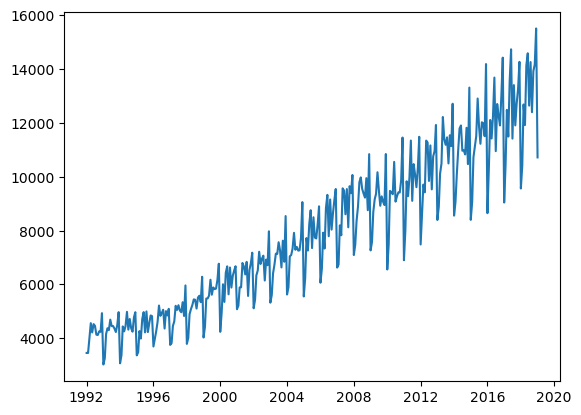

In [10]:
plt.plot(df)
plt.show()

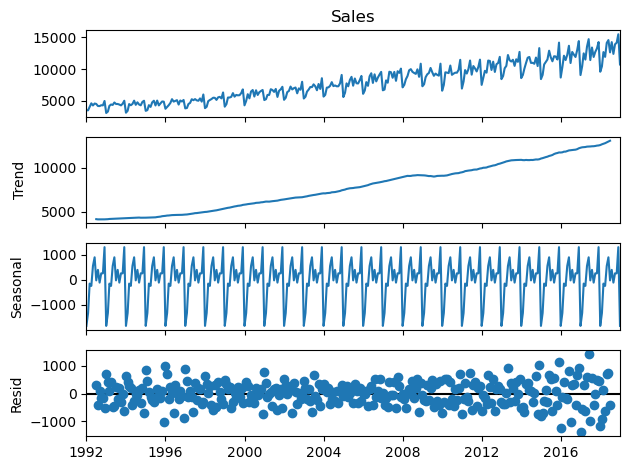

In [11]:
result = seasonal_decompose(df["Sales"])
result.plot();

In [12]:
print(len(df))
print(325-12)

325
313


In [13]:
# karena kita ingin forecast monthly
train = df.iloc[:313]
test = df.iloc[313:]

In [14]:
train

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2017-09-01,11907
2017-10-01,12711
2017-11-01,13261


In [15]:
sc = MinMaxScaler()
train_transform = sc.fit_transform(train)
test_tranform = sc.transform(test)

In [16]:
n_input = 24
n_features = 1

generator = TimeseriesGenerator(train_transform, train_transform, length = n_input, batch_size = 1)

In [2]:
rnn = Sequential()

rnn.add(LSTM(units = 150, activation = "relu", return_sequences = True, input_shape = (n_input, n_features)))

rnn.add(LSTM(units = 150, activation = "relu"))

rnn.add(Dense(units = 1))

rnn.compile(optimizer = "adam", loss = "mse")

NameError: name 'Sequential' is not defined

In [18]:
rnn.fit(generator, epochs=50)

Epoch 1/50
  6/289 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.7006

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0690
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0087
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0099
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0079
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0115
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0094
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0081
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0068
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0068
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0051
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0051
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0049
Epoch 13/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0039
Epoch 14/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0038
Epoch 15/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step

In [19]:
first_eval_batch = train_transform[-n_input:]

In [20]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch.shape

(1, 24, 1)

In [21]:
rnn.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step


array([[0.6691587]], dtype=float32)

## FORECAST

In [23]:
test_prediction = []

first_eval_batch = train_transform[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = rnn.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [24]:
hasil_akhir = []

for i in range(len(test_prediction)):
    hasil_akhir.append(test_prediction[i][0])

In [25]:
hasil_akhir = np.array(hasil_akhir)
hasil_akhir = hasil_akhir.reshape(-1,1)

In [26]:
hasil_akhir = sc.inverse_transform(hasil_akhir)
hasil_akhir = hasil_akhir.reshape(-1)

In [27]:
test["Predict"] = hasil_akhir

C:\Users\fadhe\AppData\Local\Temp\ipykernel_10944\3775514901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predict"] = hasil_akhir


In [28]:
test

,Sales,Predict
DATE,,
2018-02-01,10415,10859.487305
2018-03-01,12683,12072.328125
2018-04-01,11919,11565.118164
2018-05-01,14138,12304.765625
2018-06-01,14583,13327.849609
2018-07-01,12640,11258.690430
2018-08-01,14257,12550.632812
2018-09-01,12396,12168.426758
2018-10-01,13914,11990.127930


<Axes: xlabel='DATE'>

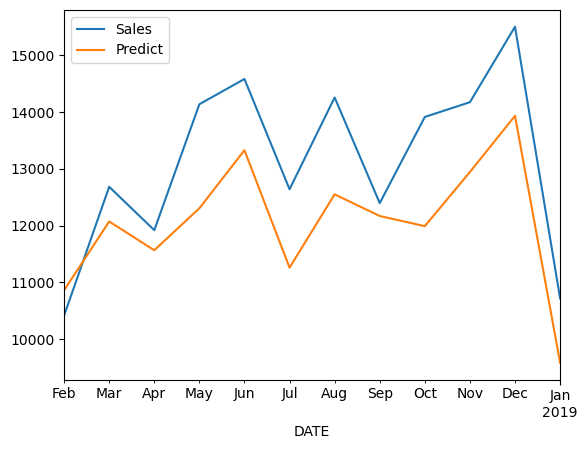

In [29]:
test.plot()

In [30]:
y_test = test["Sales"]
y_pred = test["Predict"]                                                          

rata2 = y_test.mean()

akurasi = 1-mean_absolute_error(y_test,y_pred)/rata2
print(f"akurasi dari model ini adalah {akurasi}")

akurasi dari model ini adalah 0.9131101558974616
